In [0]:
#coding:utf8
import torch
import torch.nn as nn
import torch.nn.functional as F
torch.manual_seed(1)
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


90


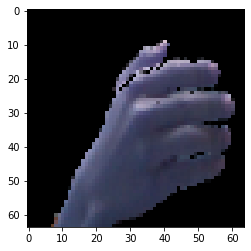

In [57]:
with open('1574757410.pkl', 'rb') as inp:
  data = pickle.load(inp)
print(len(data[0]))
plt.imshow(data[0][20][0])

In [0]:
config={}
config['cnn1_channels'] = 1
config['cnn2_channels'] = 6
config['cnn3_channels'] = 12

In [0]:
class LSTM_ges(nn.Module):
    def __init__(self):
      super(LSTM_ges,self).__init__()
      self.feats = nn.Sequential(
            nn.Conv2d(3, 12, 3, 1, 1),
            nn.MaxPool2d(2, 2),
            nn.ReLU(True),
            nn.BatchNorm2d(12),

            nn.Conv2d(12, 28, 3,  1, 1),
            nn.ReLU(True),
            nn.BatchNorm2d(28),

            nn.Conv2d(28, 64, 3,  1, 1),
            nn.MaxPool2d(2, 2),
            nn.ReLU(True),
            nn.BatchNorm2d(64),

            nn.Conv2d(64, 16, 3, 1, 1),
            nn.MaxPool2d(2, 2),
            nn.ReLU(True),
            nn.BatchNorm2d(16)
        )
      self.fc = nn.Sequential(
          nn.Linear(16*8*8, 120),
          nn.ReLU(False),
          nn.Linear(120, 84),
          nn.ReLU(False),
          nn.Linear(84, 64)
      )
      self.lstm = nn.Sequential(
          nn.LSTM(input_size=64,hidden_size=82,num_layers=3, bidirectional=False)
      )
      self.linear = nn.Linear(82,20)
    def forward(self, x):
      x = self.feats(x)
      x = x.view(x.size(0),-1)
      x = self.fc(x)
      x, hidden = self.lstm(x.unsqueeze(1))
      x = self.linear(x)
      return x

In [0]:
model = LSTM_ges()

In [54]:
model

LSTM_ges(
  (feats): Sequential(
    (0): Conv2d(3, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU(inplace=True)
    (3): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): Conv2d(12, 28, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU(inplace=True)
    (6): BatchNorm2d(28, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Conv2d(28, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): ReLU(inplace=True)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Conv2d(64, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (13): ReLU(inplace=True)
    (14): BatchNorm2d(16, eps=1e-

In [55]:
input_data = data[0][20][0].astype(np.float32).transpose(2, 1, 0)
model.forward(torch.tensor([input_data])).size()

torch.Size([1, 1, 20])